Ciclo Crisis 52-55 ignorado (fuera de rango)
Ciclo Expansión 56-69 ignorado (fuera de rango)
Ciclo Recesión 70-81 ignorado (fuera de rango)


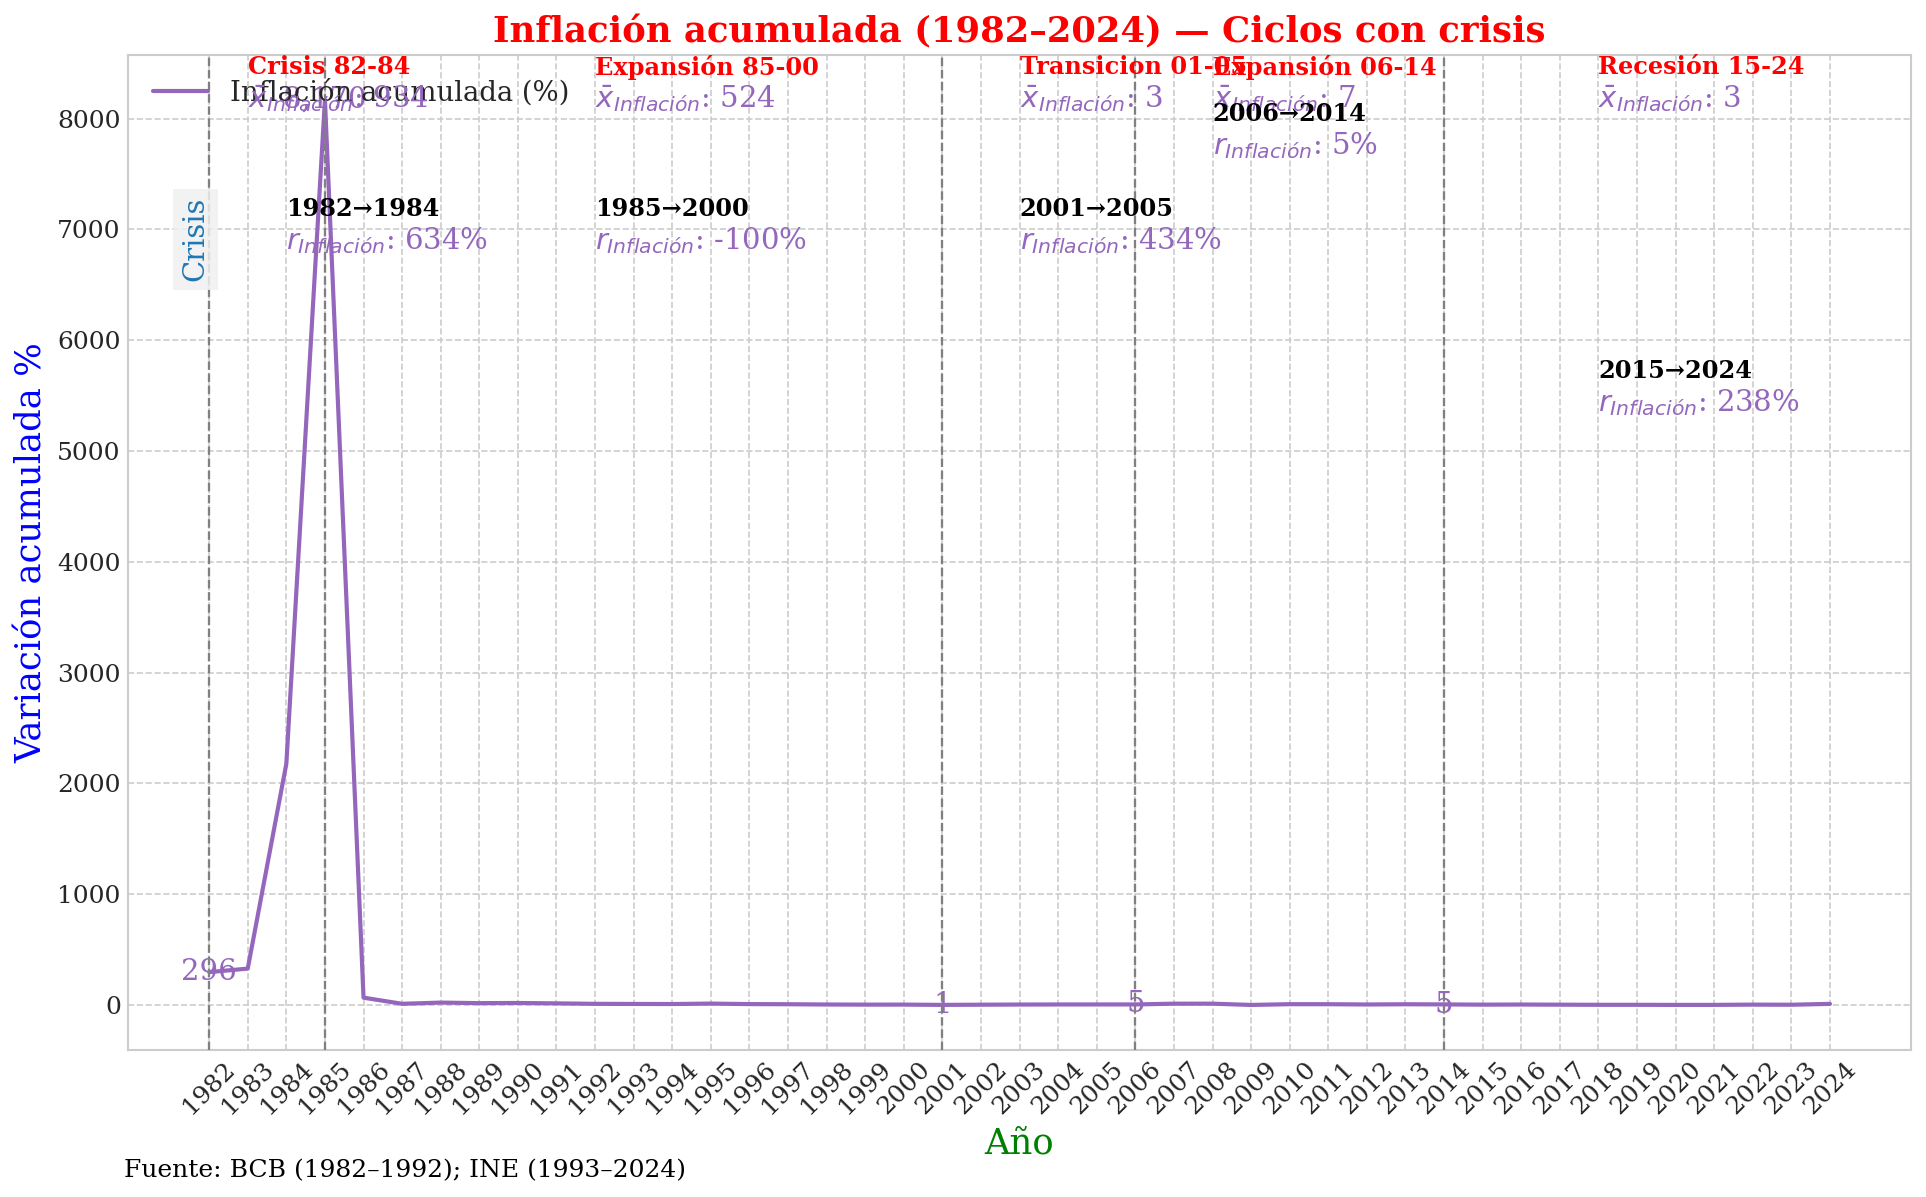

In [1]:
# %%
# ─────────────────────────────────────────────────────────────────────
# Importaciones comunes
# ─────────────────────────────────────────────────────────────────────
import sys, os, sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# utilidades propias
sys.path.append(os.path.abspath('../'))
from graficos_utils import (
    set_style, init_base_plot, get_df,
    add_hitos, add_year_value_annotations,
    add_cycle_means_multi, add_period_growth_annotations_multi,
    add_participation_cycle_boxes,
    adjust_annot_years, adjust_cycles, adjust_periods,
)
from config import (
    # constantes para GRÁFICA 1 (con crisis)
    CYCLES, annot_years, periodos_tasas, hitos_v,
    # constantes para GRÁFICA 2 (sin crisis)
    CYCLES_SIN_CRISIS, annot_years_sin_crisis, periodos_tasas_sin_crisis, hitos_v_sin_crisis,
    # constantes para GRÁFICA 3 (periodos estructurales)
    CYCLES_PERIODOS, annot_years_periodos, periodos_tasas_periodos, hitos_v_periodos,
)

# Directorio de salida (indicador = inflacion_acumulada)
output_dir = "../../../../assets/tesis/serie_completa/inflacion_acumulada"
os.makedirs(output_dir, exist_ok=True)

# Estilo corporativo
set_style()

# %%
# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT año, inflacion
    FROM inflacion_acumulada
"""
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df_inf = (
        pd.read_sql(SQL, conn, index_col='año')
          .sort_index()
    )
# Componentes y colores
componentes      = [("inflacion", "Inflación acumulada (%)")]
cols_componentes = ["inflacion"]
custom_colors    = {"inflacion": "#9467bd"}  # púrpura
abbr_map         = {"inflacion": "Inflación"}

# %%
# ============================================================
# 1) GRÁFICA CON CRISIS (estructura base)
# ============================================================
annot_years_crisis = adjust_annot_years(df_inf, annot_years)
cycles_stats       = {n: df_inf.loc[s, cols_componentes].mean().to_dict()
                     for n, s in adjust_cycles(df_inf, CYCLES).items()}
periodos_crisis    = adjust_periods(df_inf, periodos_tasas)

# ── Offsets ───────────────────────────────────────────
annotation_offsets = {
    'inflacion': {
        1982: (0, -2.0), 1985: (0, 2.0), 2001: (0, -2.0),
        2006: (0,  2.2), 2014: (0, -2.2), 2023: (0,  2.4),
    }
}
# hitos: relación vertical uniforme
hitos_offset = {a: 0.85 for a in hitos_v}
# medias (texto de ciclos)
medias_offsets = {
    'Crisis 82-84':  (1983, 1),
    'Expansión 85-00': (1992, 1),
    'Transicion 01-05':    (2003, 1),
    'Expansión 06-14': (2008, 1),
    'Recesión 15-24':  (2018, 1),
}
# tasas de crecimiento por periodo
tasas_offsets = {
    '1982-1984': (1984, 0.85),
    '1985-2000': (1992, 0.85),
    '2001-2005': (2003, 0.85),
    '2006-2014': (2008, 0.95),
    '2015-2024': (2018, 0.68),
}
# participación (no aplica → colocar fuera de vista)
participation_offsets = {k: (v[0], -999) for k, v in tasas_offsets.items()}

fig, ax = init_base_plot(
    df_inf, componentes, custom_colors,
    "Inflación acumulada (1982–2024) — Ciclos con crisis",
    "Año", "Variación acumulada %",
    source_text="Fuente: BCB (1982–1992); INE (1993–2024)"
)
add_hitos(ax, df_inf.index, hitos_v, hitos_offset)
add_year_value_annotations(ax, df_inf, annot_years_crisis,
                           cols_componentes, annotation_offsets, custom_colors,
                           arrow_lw=0.4)
add_cycle_means_multi(ax, cycles_stats, medias_offsets,
                      abbr_map, custom_colors,
                      line_spacing=ax.get_ylim()[1]*0.03)
add_period_growth_annotations_multi(ax, df_inf, periodos_crisis,
                                    cols_componentes, tasas_offsets,
                                    custom_colors, abbr_map)
# participación omitida

plt.savefig(os.path.join(output_dir, "inflacion_acumulada_crisis.png"))
plt.show()
plt.close()

Ciclo Expansión 56-69 ignorado (fuera de rango)


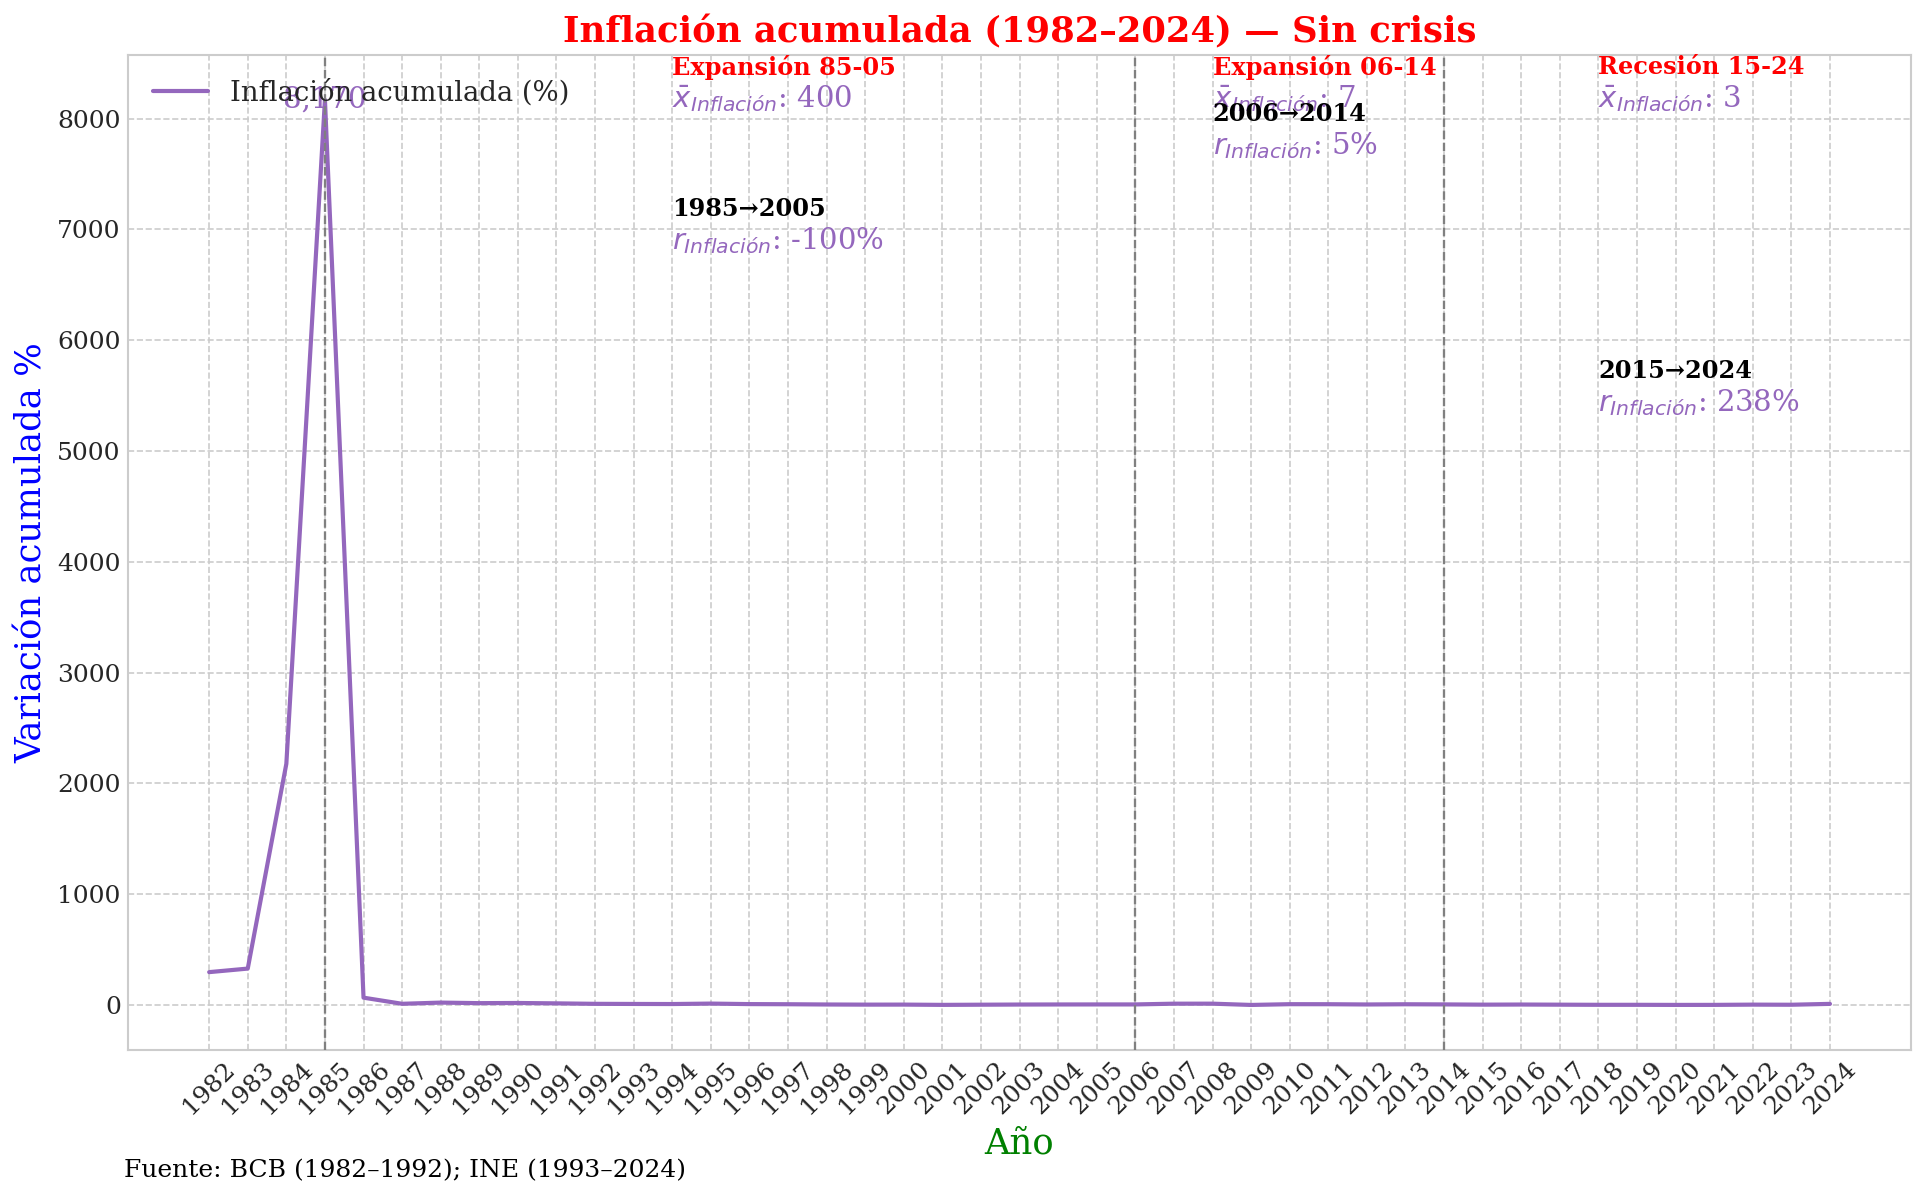

In [2]:
# ============================================================
# 2) GRÁFICA SIN CRISIS
# ============================================================
annot_years_sin   = adjust_annot_years(df_inf, annot_years_sin_crisis)
cycles_stats_sin  = {n: df_inf.loc[s, cols_componentes].mean().to_dict()
                     for n, s in adjust_cycles(df_inf, CYCLES_SIN_CRISIS).items()}
periodos_sin      = adjust_periods(df_inf, periodos_tasas_sin_crisis)

annotation_offsets_sin_crisis = {
    'inflacion': {
        1950: (0, 0), 1971: (0, 0), 1985: (0, -2),
        2005: (0, 2), 2015: (0, -2), 2022: (0, 2)
    }
}
hitos_offset_sin_crisis = {a: 0.85 for a in hitos_v_sin_crisis}
medias_offsets_sin_crisis = {
    'Expansión 50-70': (1960, 1),
    'Recesión 71-84':  (1978, 1),
    'Expansión 85-05': (1994, 1),
    'Expansión 06-14': (2008, 1),
    'Recesión 15-24':  (2018, 1),
}
tasas_offsets_sin_crisis = {
    '1950-1970': (1960, 0.85),
    '1971-1984': (1978, 0.85),
    '1985-2005': (1994, 0.85),
    '2006-2014': (2008, 0.95),
    '2015-2024': (2018, 0.68),
}
participation_offsets_sin_crisis = {k: (v[0], -999) for k, v in tasas_offsets_sin_crisis.items()}

fig, ax = init_base_plot(
    df_inf, componentes, custom_colors,
    "Inflación acumulada (1982–2024) — Sin crisis",
    "Año", "Variación acumulada %",
    source_text="Fuente: BCB (1982–1992); INE (1993–2024)"
)
add_hitos(ax, df_inf.index, hitos_v_sin_crisis, hitos_offset_sin_crisis)
add_year_value_annotations(ax, df_inf, annot_years_sin,
                           cols_componentes, annotation_offsets_sin_crisis,
                           custom_colors, arrow_lw=0.4)
add_cycle_means_multi(ax, cycles_stats_sin, medias_offsets_sin_crisis,
                      abbr_map, custom_colors,
                      line_spacing=ax.get_ylim()[1]*0.03)
add_period_growth_annotations_multi(ax, df_inf, periodos_sin,
                                    cols_componentes, tasas_offsets_sin_crisis,
                                    custom_colors, abbr_map)
plt.savefig(os.path.join(output_dir, "inflacion_acumulada_sin_crisis.png"))
plt.show()
plt.close()


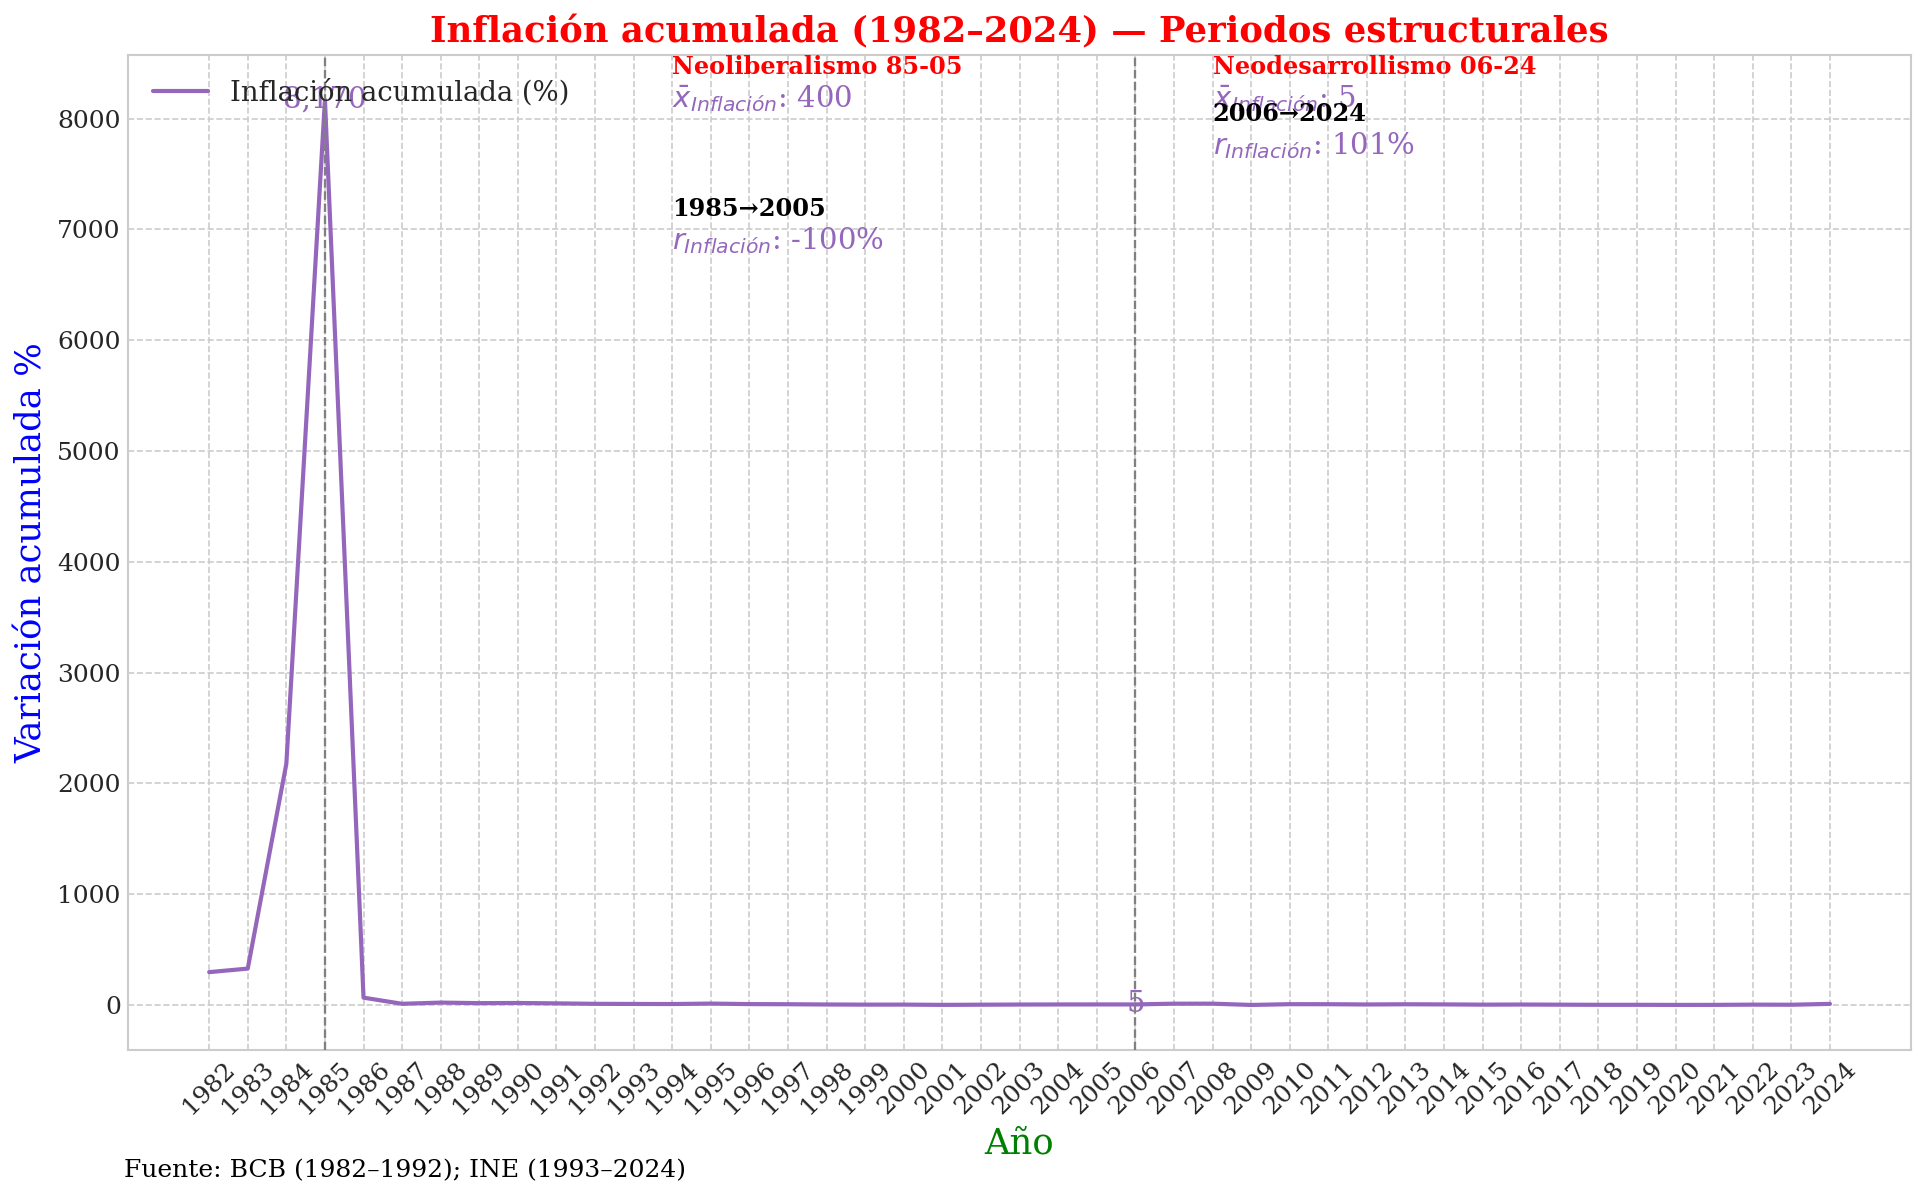

In [3]:
# ============================================================
# 3) GRÁFICA POR PERIODOS ESTRUCTURALES
# ============================================================
annot_years_per   = adjust_annot_years(df_inf, annot_years_periodos)
cycles_stats_per  = {n: df_inf.loc[s, cols_componentes].mean().to_dict()
                     for n, s in adjust_cycles(df_inf, CYCLES_PERIODOS).items()}
periodos_per      = adjust_periods(df_inf, periodos_tasas_periodos)

annotation_offsets_periodos = {
    'inflacion': {
        1950: (0, -2), 1985: (0, -2), 2006: (0, 2), 2022: (0, -2)
    }
}
hitos_offset_periodos = {a: 0.85 for a in hitos_v_periodos}
medias_offsets_periodos = {
    'Intervensionismo-estatal 50-84': (1960, 1),
    'Neoliberalismo 85-05':          (1994, 1),
    'Neodesarrollismo 06-24':        (2008, 1),
}
tasas_offsets_periodos = {
    '1950-1984': (1960, 0.85),
    '1985-2005': (1994, 0.85),
    '2006-2024': (2008, 0.95),
}
participation_offsets_periodos = {k: (v[0], -999) for k, v in tasas_offsets_periodos.items()}

fig, ax = init_base_plot(
    df_inf, componentes, custom_colors,
    "Inflación acumulada (1982–2024) — Periodos estructurales",
    "Año", "Variación acumulada %",
    source_text="Fuente: BCB (1982–1992); INE (1993–2024)"
)
add_hitos(ax, df_inf.index, hitos_v_periodos, hitos_offset_periodos)
add_year_value_annotations(ax, df_inf, annot_years_per,
                           cols_componentes, annotation_offsets_periodos,
                           custom_colors, arrow_lw=0.4)
add_cycle_means_multi(ax, cycles_stats_per, medias_offsets_periodos,
                      abbr_map, custom_colors,
                      line_spacing=ax.get_ylim()[1]*0.03)
add_period_growth_annotations_multi(ax, df_inf, periodos_per,
                                    cols_componentes, tasas_offsets_periodos,
                                    custom_colors, abbr_map)
plt.savefig(os.path.join(output_dir, "inflacion_acumulada_periodos.png"))
plt.show()
plt.close()
